## 1.1 Introduction

### 1.1.1 The Bayesian State of Mind

Frequentists:
* probability is the long-run frequency of events
* P(plane accidents) is the long-run frequency of plane accidents
* makes sense for many events but becomes more difficult when there is no long-term frequency

The Bayesian worldview:
* Bayesian inference preserves _uncertainty_
* probability is a measure of _believablility_ in an event
* "How confident are you that ____ will happen?"

P(A) is the **prior probability**, P(A|X) is the **posterior probability**

### 1.1.2 Bayesian Inference in Practice

My code passed all X tests; is my code bug-free?
* Frequentists: YES

Often my code has bugs. My code passed all X tests; is my code bug-free?
* Bayesians: P(YES) = 0.8, P(NO) = 0.2
* "Often my code has bugs" is the prior

For large N, statistical inference is objective. For small N, inference is unstable.

Frequentist estimates have more variance and larger confidence intervals. Bayesian estimates preserve the uncertainty.

### 1.1.3 Are Frequentist Methods Incorrect?

No, useful in various contexts: least squares linear regression, LASSO regression, expectation-maximization algorithms

### 1.1.4 A Note on "Big Data"

Big data's prediction difficulty does not rely on alogrithm used, but instead in computational difficulties of storage and execution on data.

Gelman: Once N is "large enough," you can start subdividing the data to learn more. (Men v. women, northerns and southerners)

## 1.2 Our Bayesian Framework

$$ P(A|X) = \frac{P(X|A) P(A)}{ P(X) } $$
$$ P(A|X) \propto P(X|A)P(A) $$

### 1.2.1 Mandatory Coin-Flip

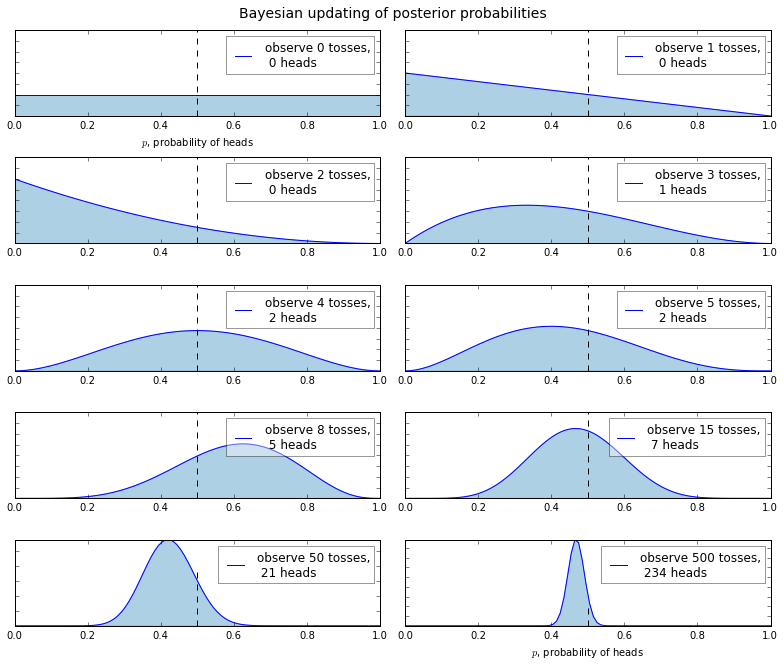

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### 1.2.2 Librarian or Farmer?

Steve is shy, very helpful, and likes things in proper order. Is he more likely to be a librarian or a farmer?

There are 20 times as many male farmers as male librarians.

* Steve is a librarian: P(A) = 1/21 = 0.047 (our prior)
* P(X|A) = probability of description given Steve is a librarian, say about 0.95
* P(X) = probability of anyone having that description
    * P(X) = P(X and A) + P(X and ~A) 
    * P(X) = P(X|A)P(A) + P(X|~A)P(~A)
    * P(X) = (0.95)(0.047) + (0.5)(0.953) = **0.52**
$$ P(A|X) = \frac{P(X|A) P(A)}{ P(X) } = \frac{ (0.951)(0.047) }{ 0.52 } = 0.087 $$

**How our posterior belief about Steve changes after finding out about his personality:**

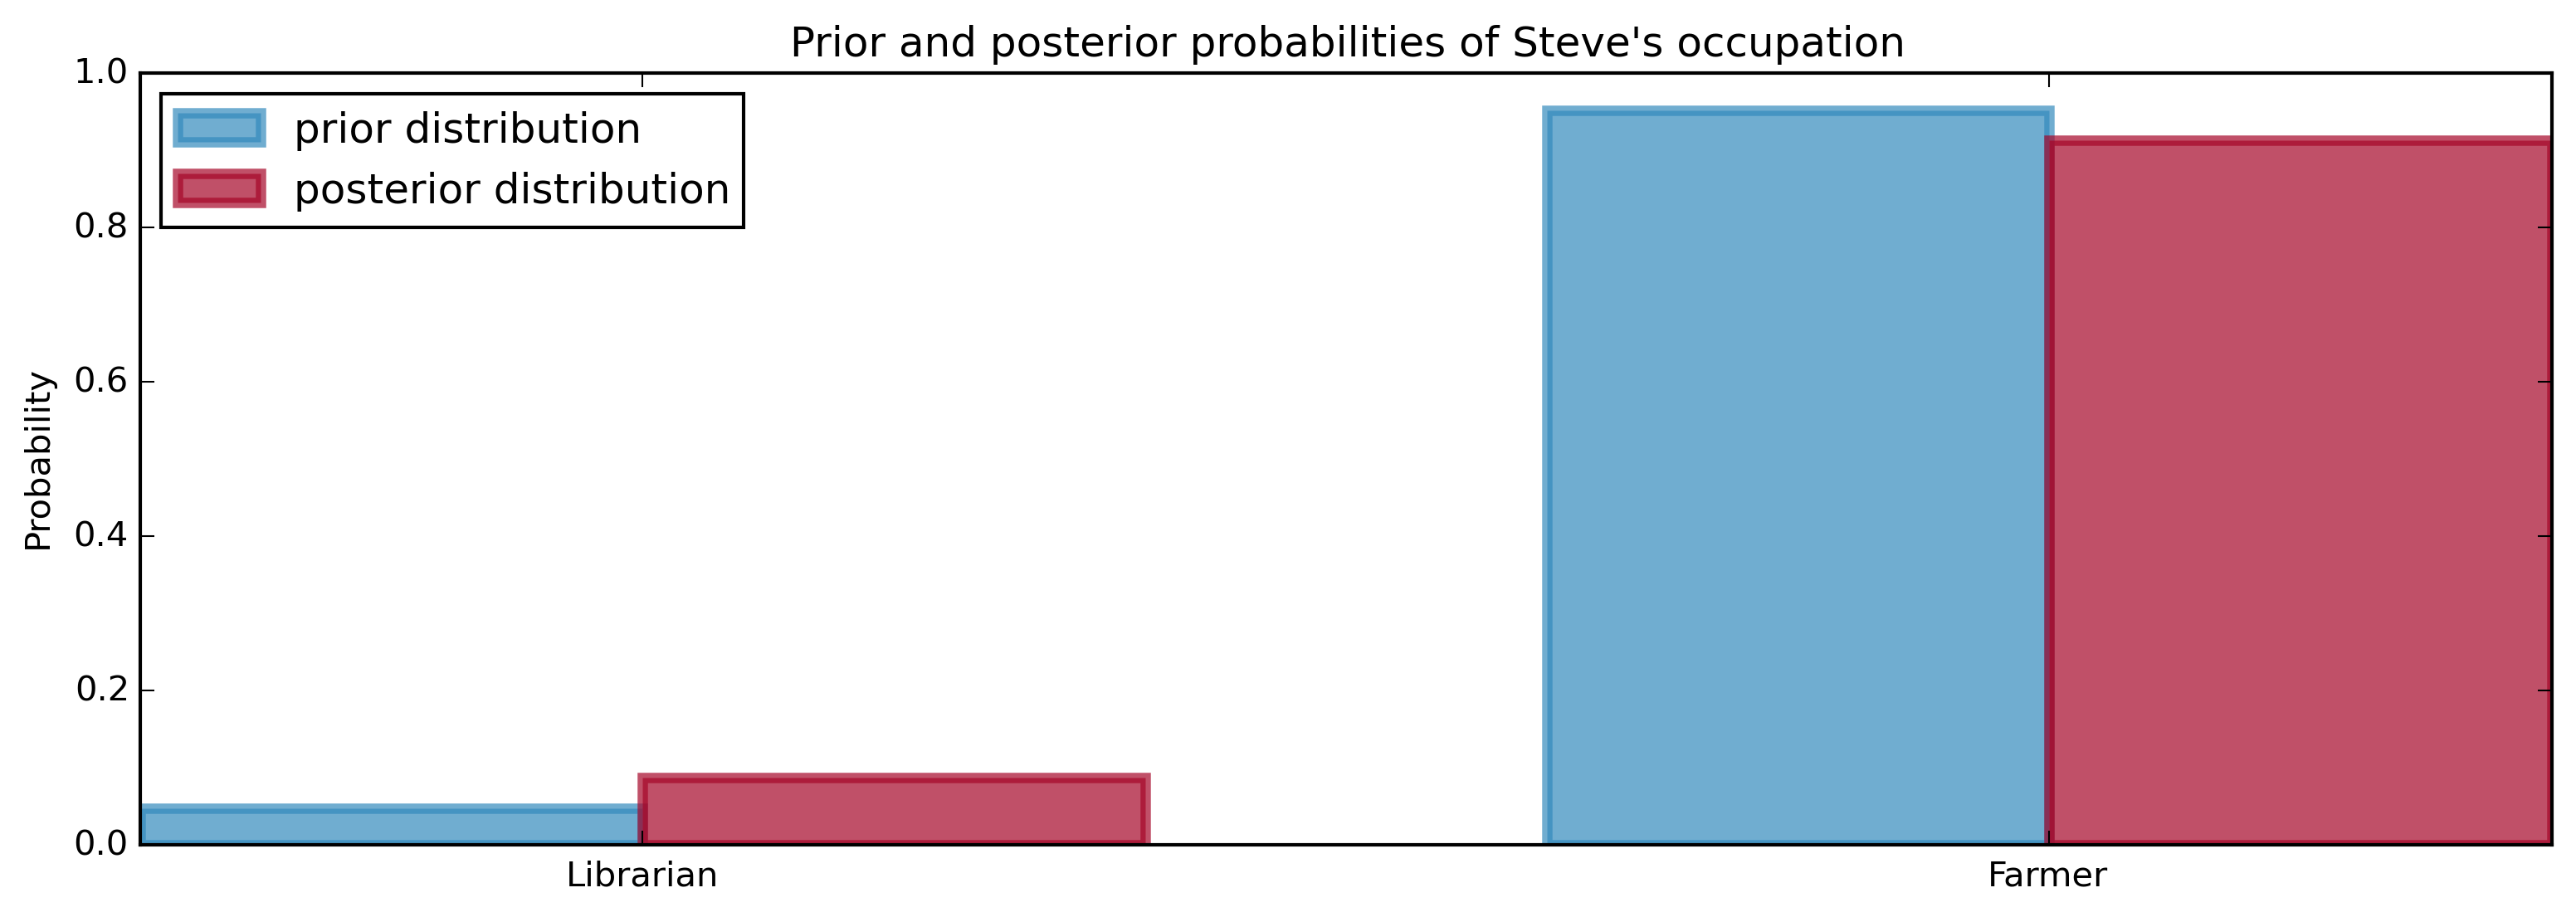

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ['#348ABD','#A60628']

prior = [1/21., 20/21.]
posterior = [0.087, 1-0.087]

plt.bar(
    [0, 0.7], prior, alpha=0.7, width=0.25,
    color=colors[0], label='prior distribution',
    lw='3', edgecolor=colors[0]
)
plt.bar(
    [0+0.25, 0.7+0.25], posterior, alpha=0.7, width=0.25,
    color=colors[1], label='posterior distribution',
    lw='3', edgecolor=colors[1]
)
plt.xticks([0.25, 0.95], ["Librarian", "Farmer"])
plt.title("Prior and posterior probabilities of Steve's occupation")
plt.ylabel("Probability")
plt.legend(loc="upper left")

## 1.3 Probability distributions

See [notebook](Probability%20Distributions.ipynb)

### 1.3.3 But What is $\lambda$?

Bayesian inference is concerned with beliefs about what lambda might be. Rather than trying to guess it, we can assign probabilities to it.

## 1.4 Using computers to perform Bayesian Inference for us

Adapted to the data set of fatalities on film and television sets

In [3]:
import pandas as pd

counts = pd.read_csv('/home/ryan/misc_repos/notebooks/misc-files/fatalities.csv')
counts

,Year,Fatals
0,1992,4
1,1993,9
2,1994,4
3,1995,2
4,1996,3
5,1997,4
6,1998,1
7,1999,4
8,2000,9
9,2001,2


In [4]:
count_data = counts['Fatals']
n_count_data = len(count_data)

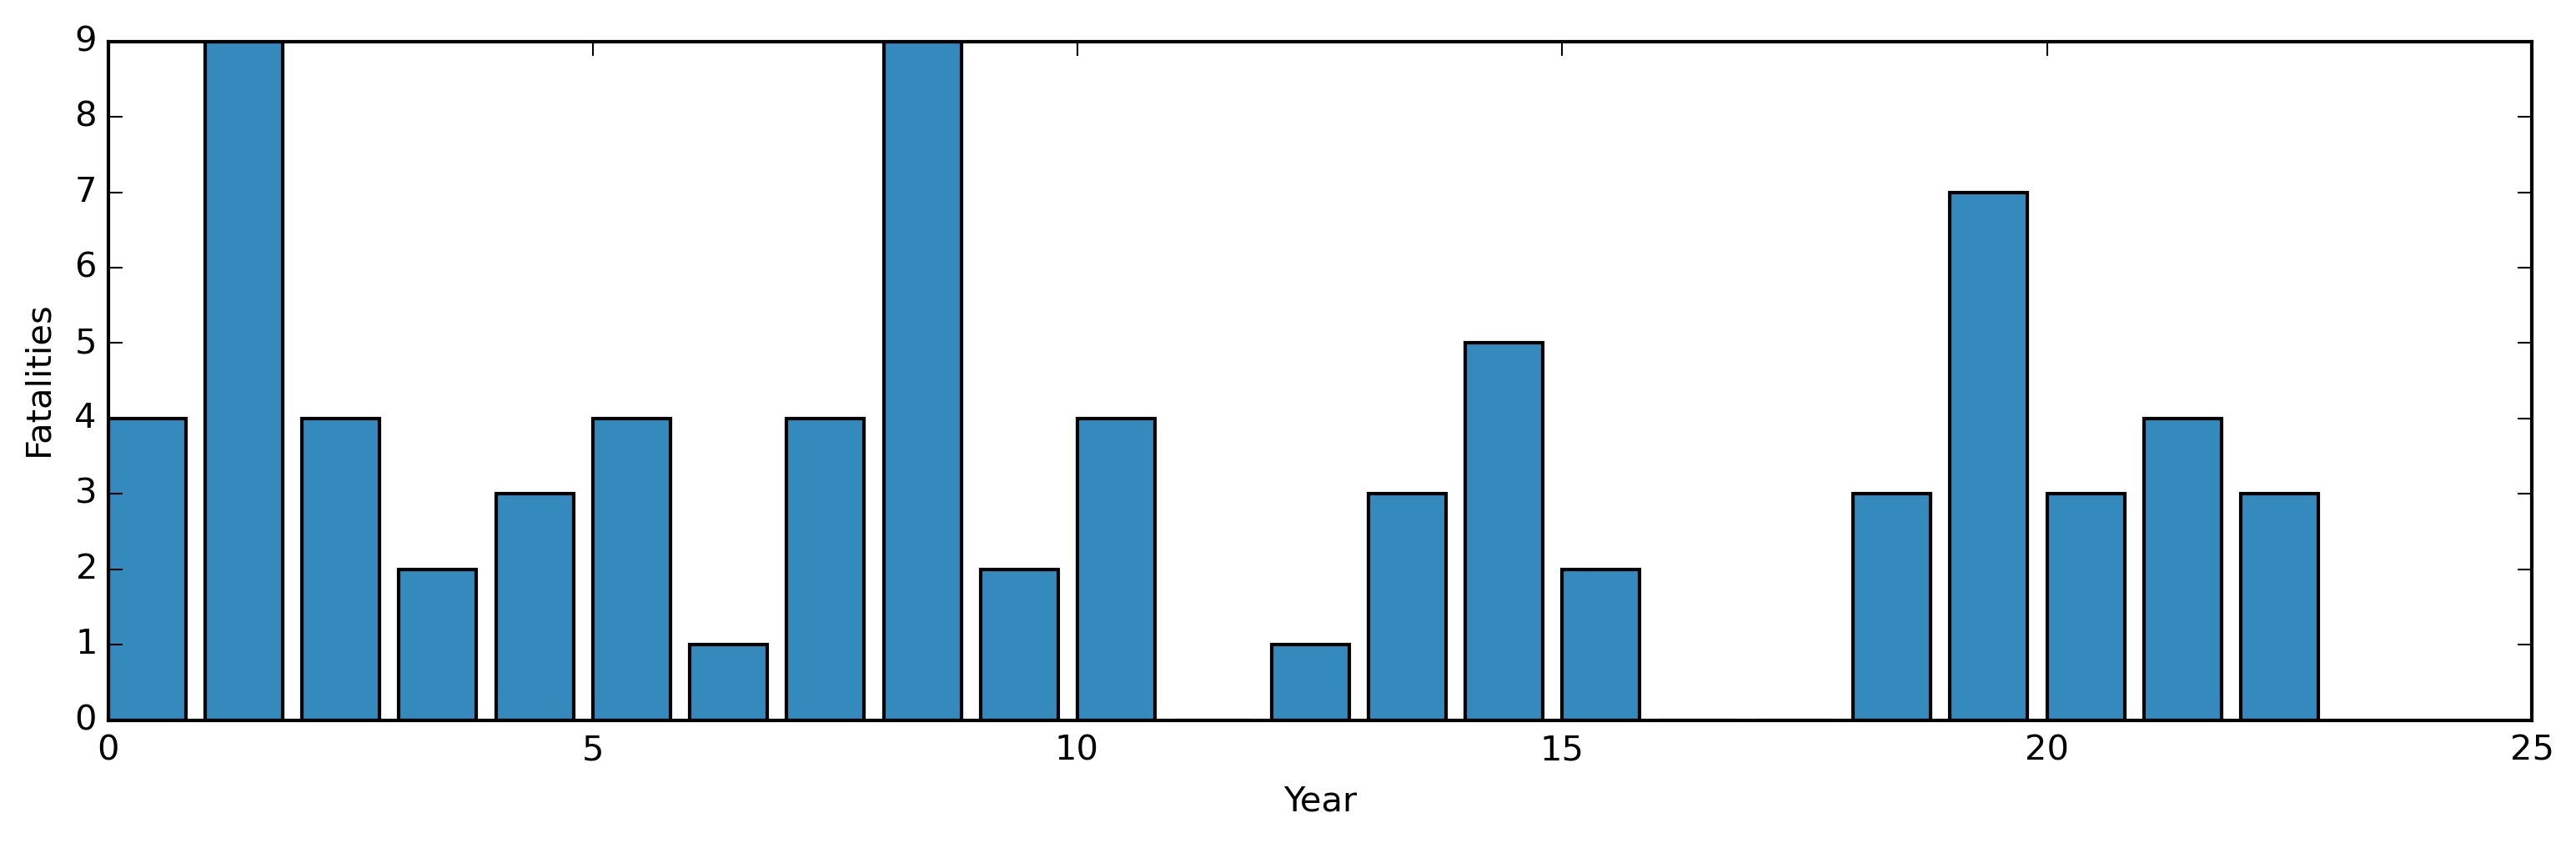

In [5]:
plt.figure(figsize=(12.5,3.5))
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Year")
plt.ylabel("Fatalities")

Was there a change in this time period?

We can start by modeling this data to a Poisson distribution. Year y's fatalities can be denoted like this:

$$ F_y \approx Poi(\lambda) $$

Let's assume that in some year (call it $\tau$) the parameter $\lambda$ suddenly changes. Lambda would change at a certain switchpoint:

$$
\lambda =
\begin{cases}
\lambda_1 & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$

We are interested in inferring the unknown lambdas so we need to assign prior probabilities to each. Lambda for a Poisson distribution can be any positive number, so we can use the Exponential distribution (since lambda does not have to be an integer. The lambdas can be modeled with *hyperparameters*:

$$
\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}
$$

To not be too opinionated, set alpha to the inverse of the sample average.

For $\tau$, it's difficult to pick out a prior where it might have occurred. Instead we can assign a **uniform prior belief** to every possible year (minus some at the end because it is likely a switchpoint did not happen there).

$$\tau \approx DiscreteUniform(1,22)$$

### 1.4.2 Introducing our First Hammer: PyMC

In [6]:
import pymc as pm

In [7]:
alpha = 1.0 / count_data.mean()

We assign the lambdas (parameter for the Poisson distribution, used to denote count in a given year, that changes at the switchpoint) to PyMC's stochastic variables.

In [8]:
lambda_1 = pm.Exponential(name="lambda_1", beta=alpha)
lambda_2 = pm.Exponential(name="lambda_2", beta=alpha)

In [9]:
tau = pm.DiscreteUniform(name="tau", lower=0, upper=n_count_data)

In [10]:
print "Random output:", tau.random(), tau.random(), tau.random()

Random output: 9 19 6


Create a new function lambda_ that is random based on lambda_1, lambda_2 and tau

In [11]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data) # number of data points
    out[:tau] = lambda_1 # before tau, all lambdas are lambda_1
    out[tau:] = lambda_2 # after and including tau, lambdas are lambda_2
    return out

Combine count_data with proposed data-generation scheme.

In [12]:
observation = pm.Poisson(name="obs", mu=lambda_, value=count_data, observed=True)

PyMC wants a model instance to collect all the variables of interest.

In [13]:
model = pm.Model(input=[observation, lambda_1, lambda_2, tau])

Markov Chain Monte Carlo (MCMC) returns thousands of random variables from the posterior distributions of $\lambda_1$, $\lambda_2$ and $\tau$.

In [14]:
mcmc = pm.MCMC(model)

In [15]:
mcmc.sample(iter=40000, burn=10000) # returns 30,000 samples

 [-----------------100%-----------------] 40000 of 40000 complete in 10.6 sec

In [16]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

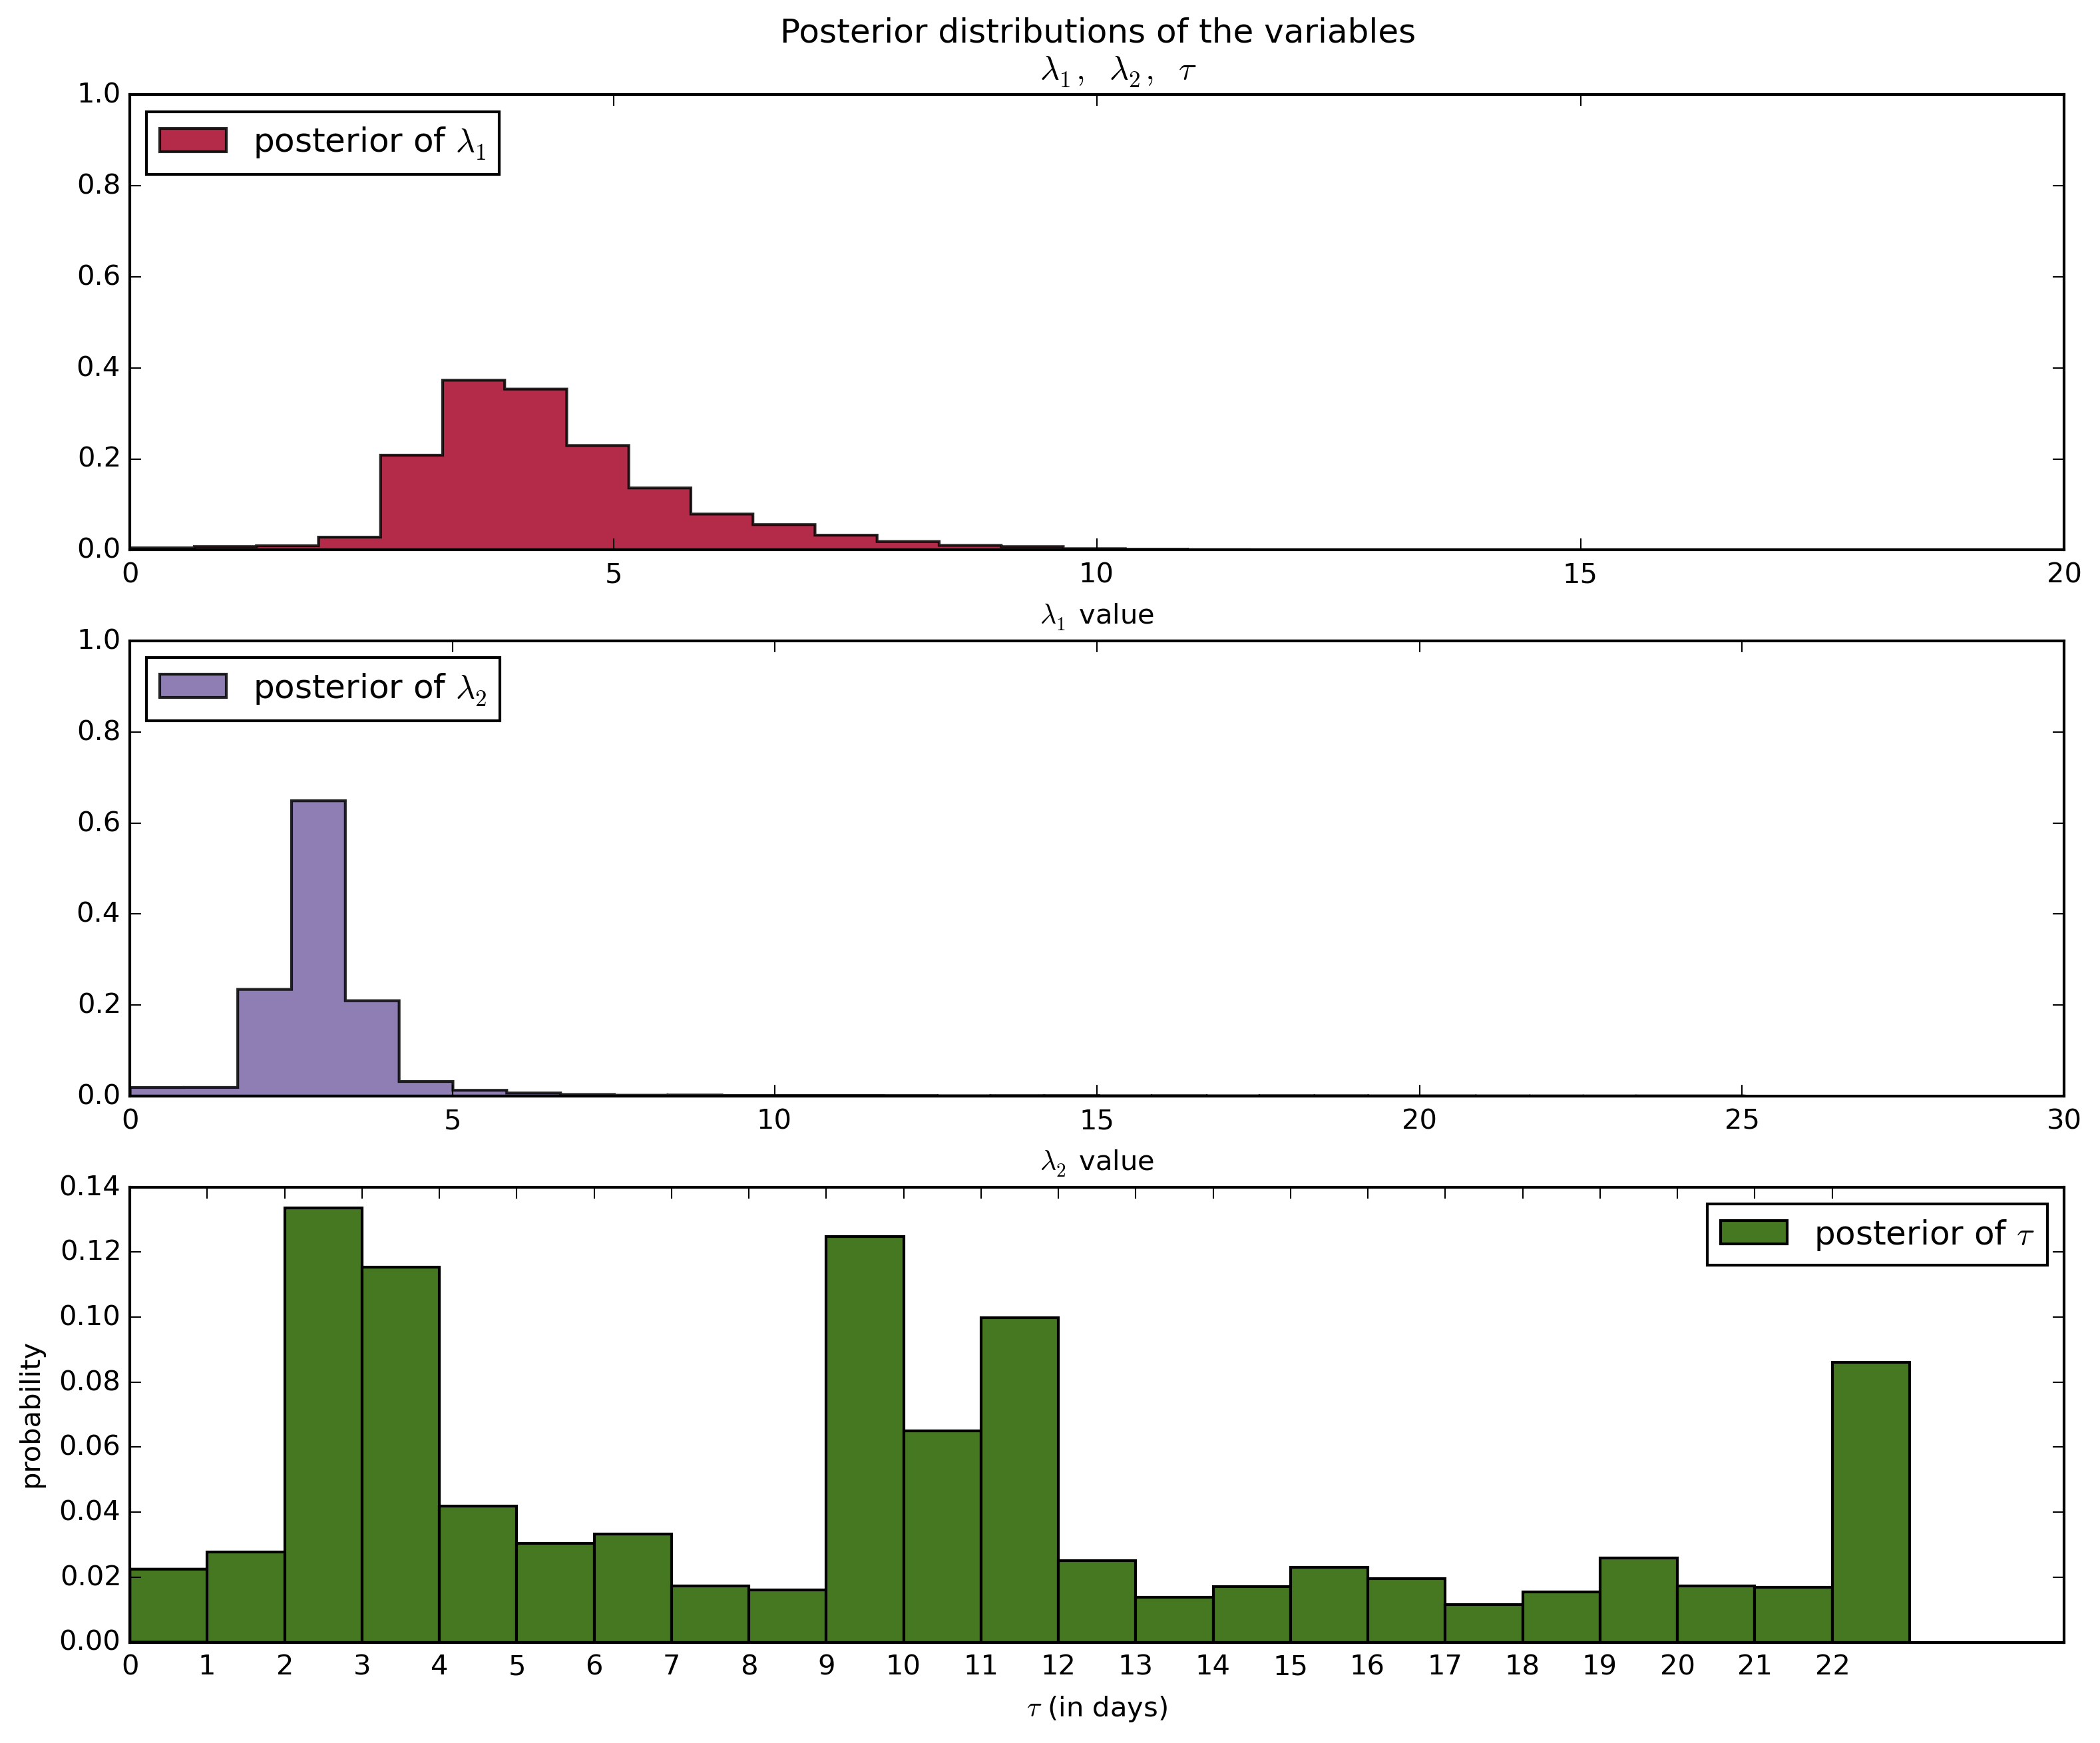

In [17]:
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
# plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
# plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper right")
# plt.ylim([0, .75])
# plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability")

### 1.4.4 What are good samples from the posterior anyway?

The question for the rest of the book.

We can use the posterior samples to calculate the expected number of fatalities in a given year y.

In [18]:
N = tau_samples.shape[0]
expected_fatalities_per_year = np.zeros(n_count_data)

In [19]:
for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_fatalities_per_year[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N

In [20]:
expected_fatalities_per_year

array([ 4.38370543,  4.37473732,  3.98080884,  3.69324898,  3.62467025,
        3.58555163,  3.5418565 ,  3.5294293 ,  3.51723511,  3.29764713,
        3.20244006,  3.04533385,  3.02022551,  3.01191853,  3.00157656,
        2.98055497,  2.96555214,  2.96519508,  2.97761808,  3.00676388,
        3.00674154,  3.00692353,  2.99989757])

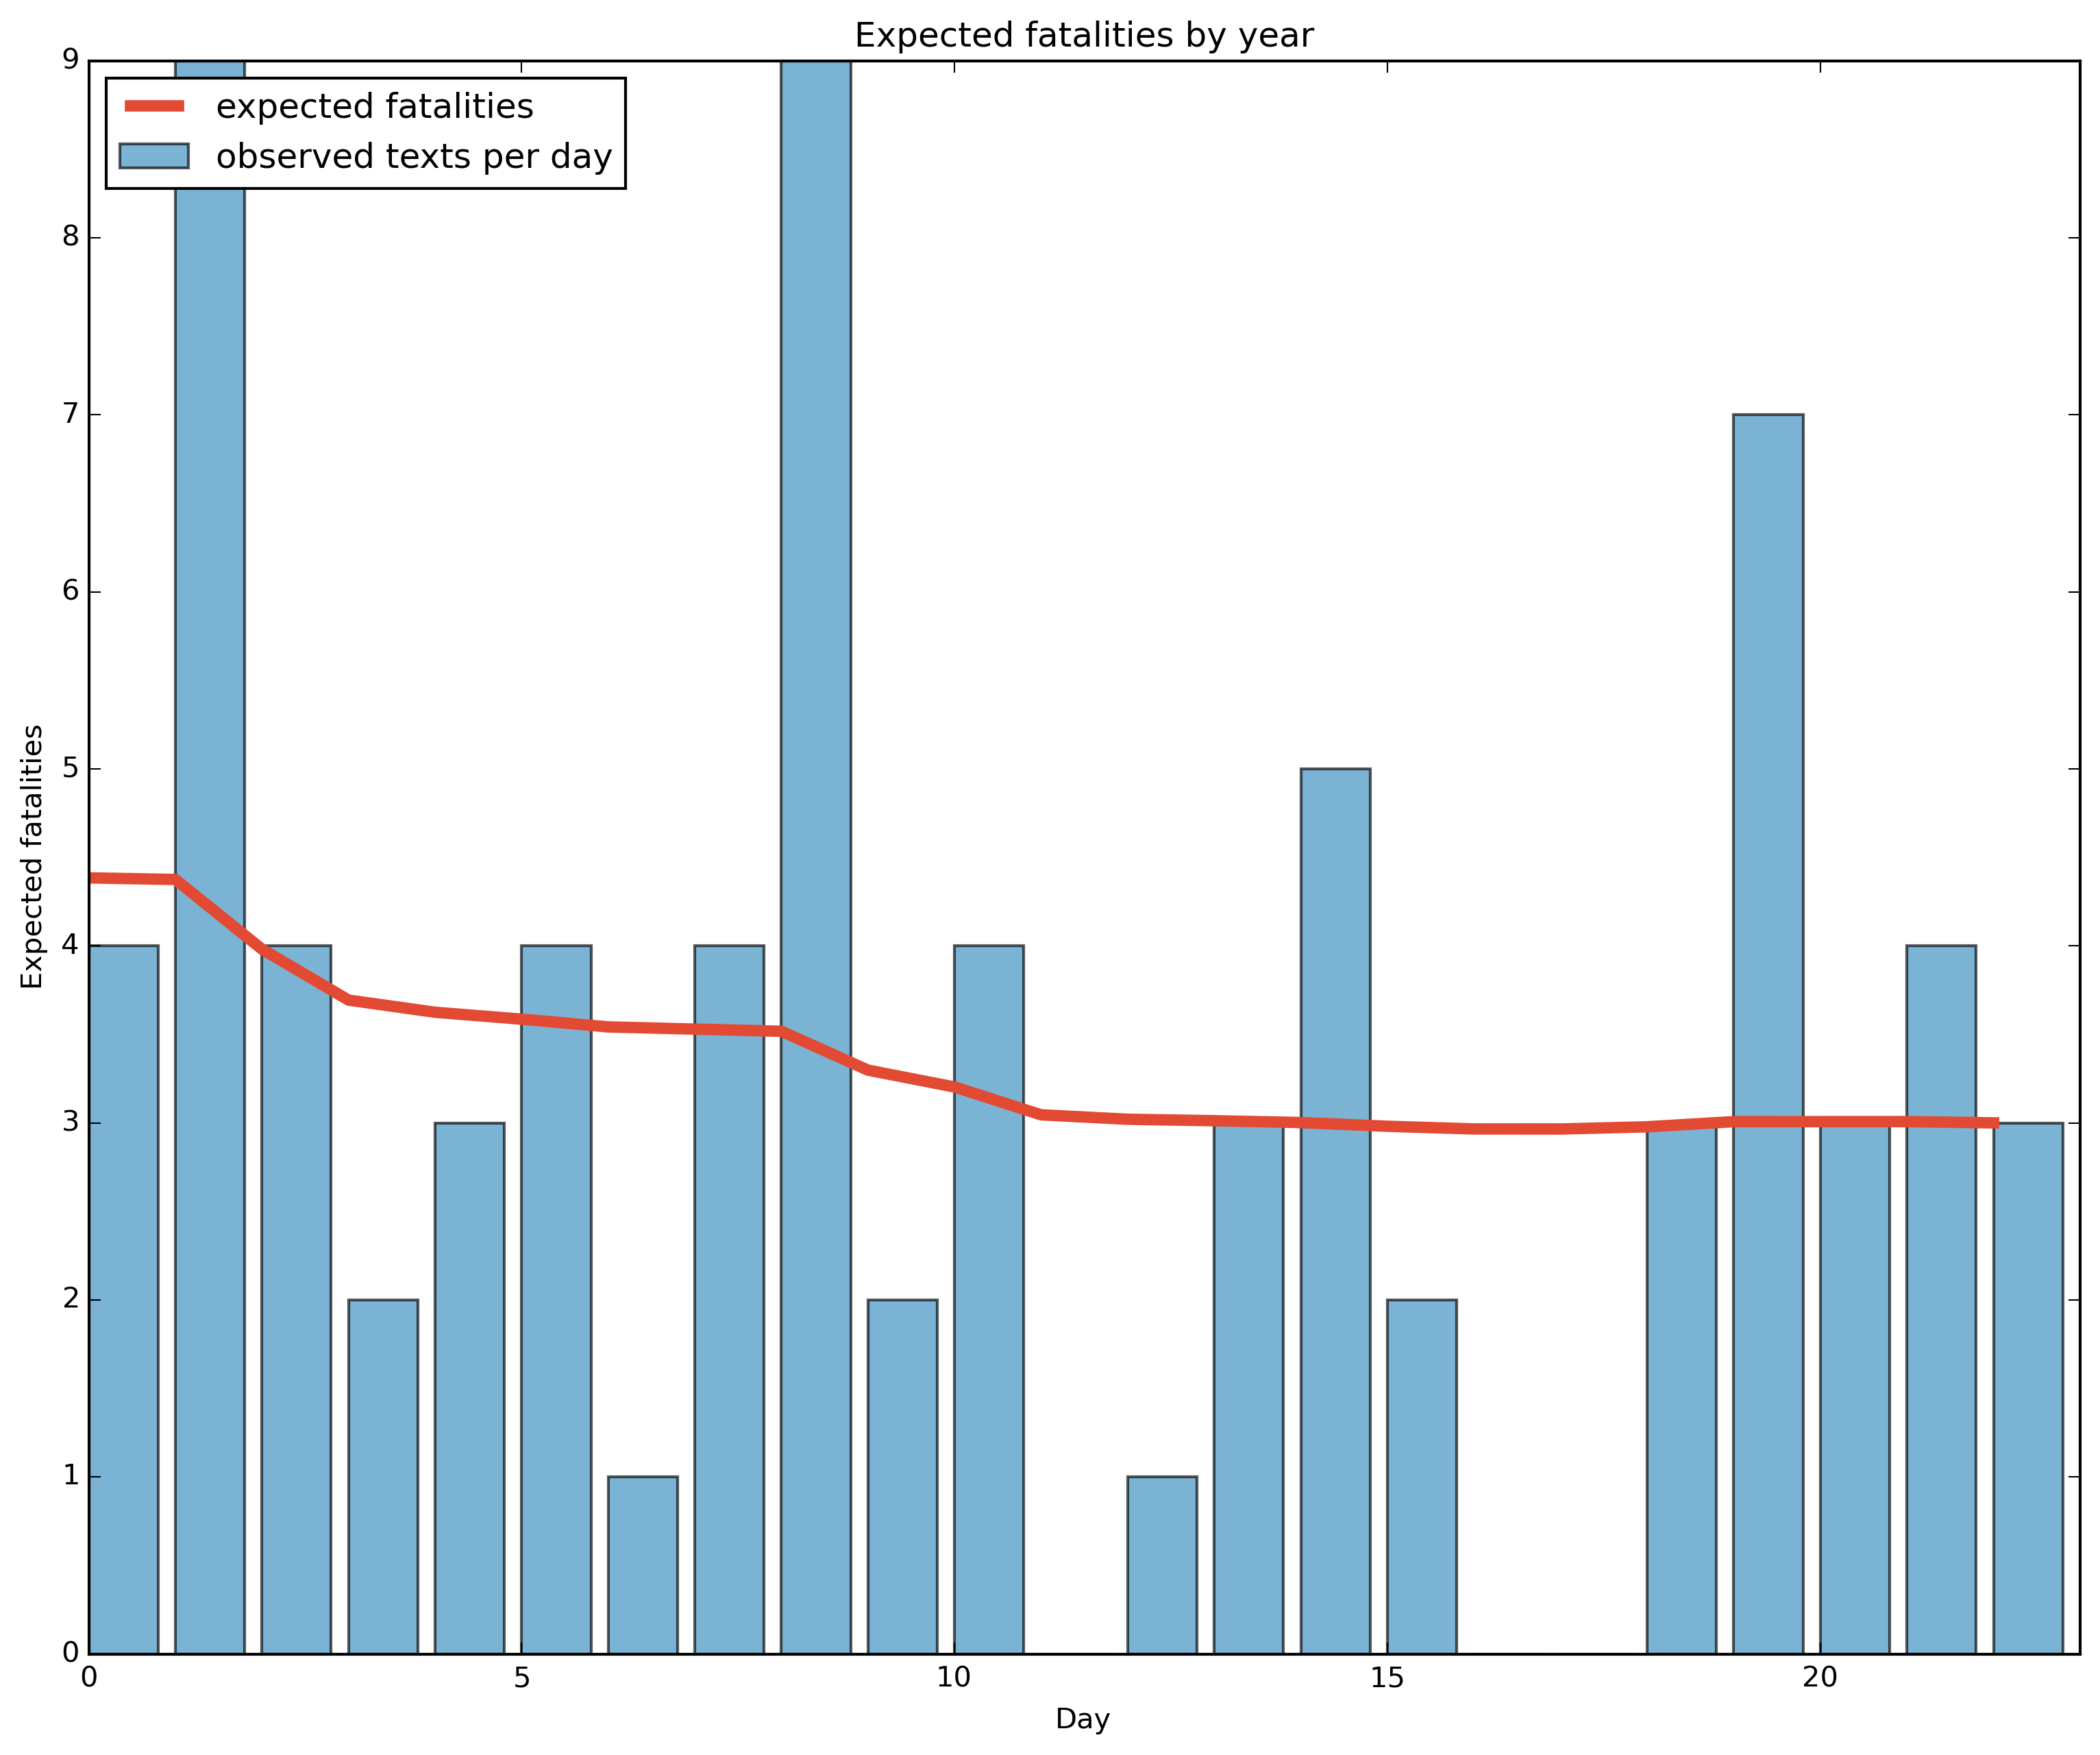

In [21]:
plt.plot(range(n_count_data), expected_fatalities_per_year, lw=4, color="#E24A33",
         label="expected fatalities")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected fatalities")
plt.title("Expected fatalities by year")
# plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

## 1.6 Appendix

### 1.6.1 Are Two lambdas indeed statistically different?

In [22]:
print lambda_1_samples
print lambda_2_samples

[ 6.80377011  6.80377011  7.14625499 ...,  3.49056545  3.49056545
  5.05743718]
[ 3.69076686  2.91450805  2.91450805 ...,  2.69669532  2.57396374
  2.57396374]


In [23]:
(lambda_1_samples < lambda_2_samples).sum()

4556

In [24]:
len(lambda_1_samples)

30000

In [25]:
(lambda_1_samples < lambda_2_samples).mean()

0.15186666666666668

In [26]:
for d in [1,2,5,10]:
    v = (abs(lambda_1_samples - lambda_2_samples) >= d).mean()
    print "What is the probability the difference is larger than %d? %.2f"%(d,v)

What is the probability the difference is larger than 1? 0.70
What is the probability the difference is larger than 2? 0.36
What is the probability the difference is larger than 5? 0.03
What is the probability the difference is larger than 10? 0.00


### 1.6.2 Multiple switchpoints

In [27]:
lambda_1 = pm.Exponential(name="lambda_1", beta=alpha)
lambda_2 = pm.Exponential(name="lambda_2", beta=alpha)
lambda_3 = pm.Exponential(name="lambda_3", beta=alpha)

tau_1 = pm.DiscreteUniform(name="tau_1", lower=0, upper=n_count_data-1)
tau_2 = pm.DiscreteUniform(name="tau_2", lower=tau_1, upper=n_count_data)

@pm.deterministic
def lambda_(tau_1=tau_1, tau_2=tau_2, lambda_1=lambda_1, lambda_2=lambda_2, lambda_3=lambda_3):
    out = np.zeros(n_count_data) # number of data points
    out[:tau_1] = lambda_1 # before tau, all lambdas are lambda_1
    out[tau_1:tau_2] = lambda_2
    out[tau_2:] = lambda_3 # after and including tau, lambdas are lambda_2
    return out

observation2 = pm.Poisson(name="obs2", mu=lambda_, value=count_data, observed=True)

model2 = pm.Model(input=[observation, lambda_1, lambda_2, lambda_3, tau_1, tau_2])

mcmc2 = pm.MCMC(model2)
mcmc2.sample(40000,10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 16.3 sec

In [28]:
lambda_1_samples = mcmc2.trace('lambda_1')[:]
lambda_2_samples = mcmc2.trace('lambda_2')[:]
lambda_3_samples = mcmc2.trace('lambda_3')[:]
tau_1_samples = mcmc2.trace('tau_1')[:]
tau_2_samples = mcmc2.trace('tau_2')[:]

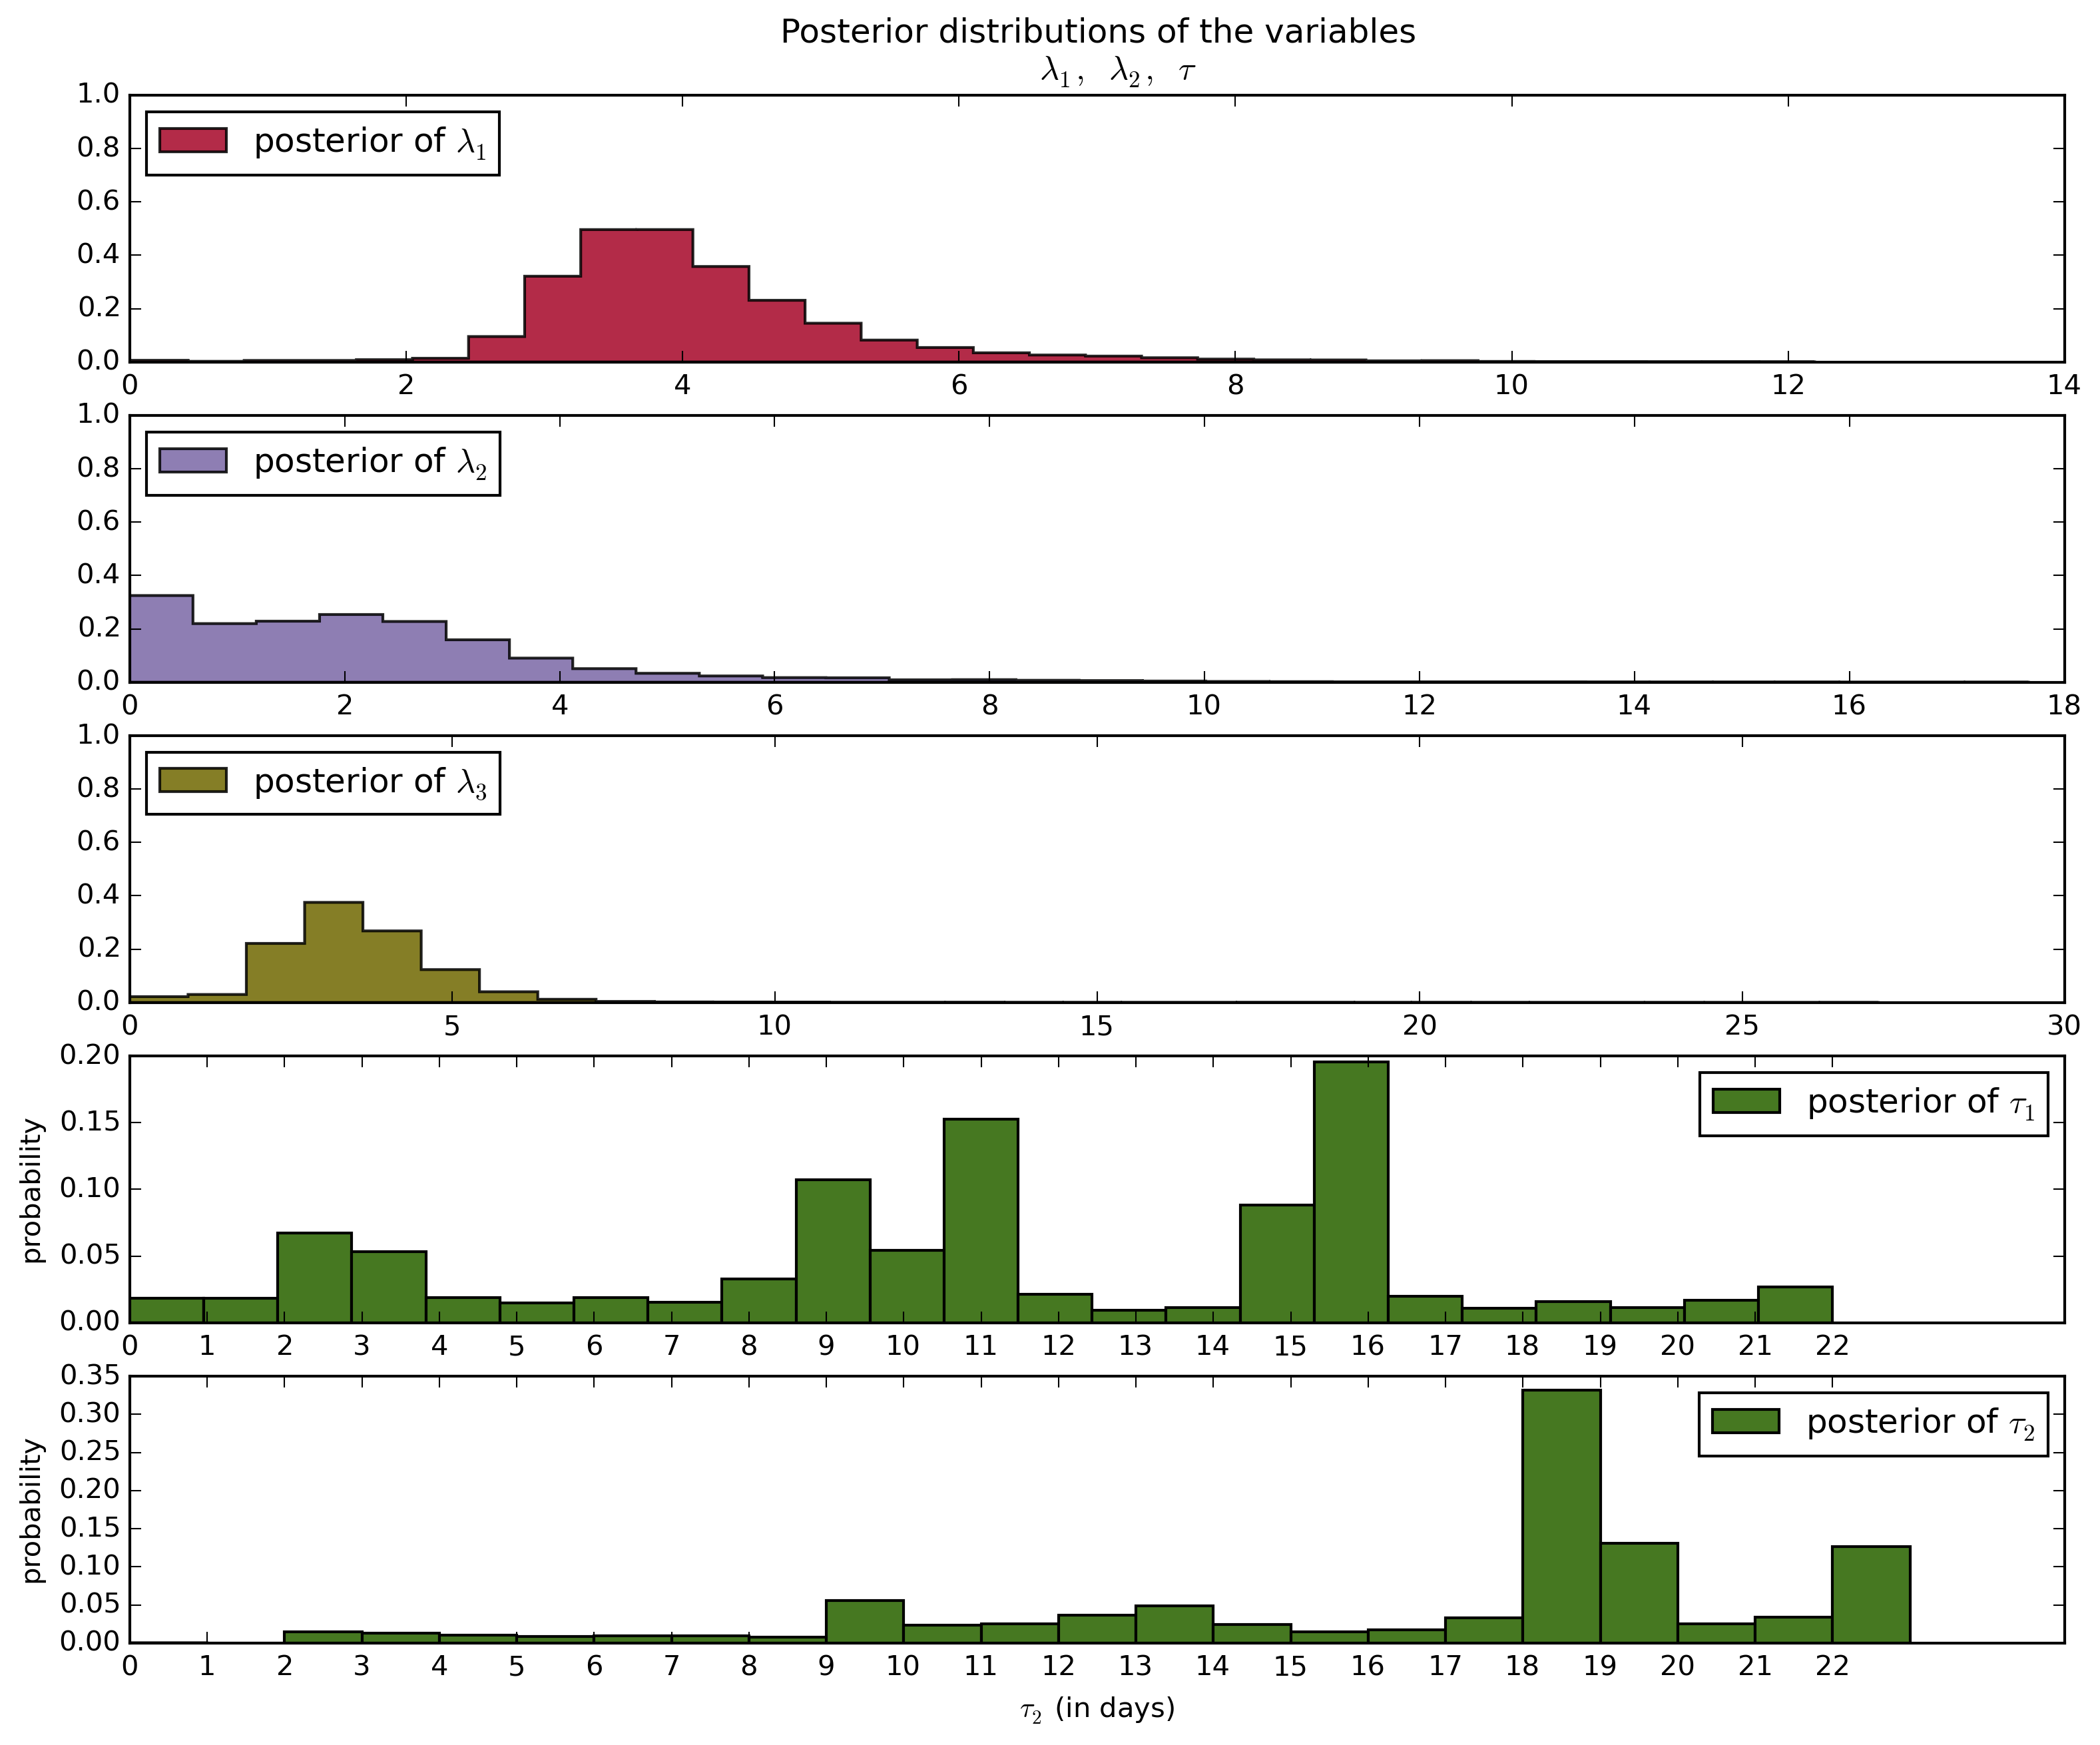

In [29]:
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(511)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
# plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(512)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
# plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

ax = plt.subplot(513)
ax.set_autoscaley_on(False)
plt.hist(lambda_3_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_3$", color="#706800", normed=True)
plt.legend(loc="upper left")
# plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")


plt.subplot(514)
w1 = 1.0 / tau_1_samples.shape[0] * np.ones_like(tau_1_samples)
plt.hist(tau_1_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau_1$",
         color="#467821", weights=w1, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper right")
# plt.ylim([0, .75])
# plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau_1$ (in days)")
plt.ylabel("probability")

plt.subplot(515)
w2 = 1.0 / tau_2_samples.shape[0] * np.ones_like(tau_2_samples)
plt.hist(tau_2_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau_2$",
         color="#467821", weights=w2, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper right")
# plt.ylim([0, .75])
# plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau_2$ (in days)")
plt.ylabel("probability")